<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Cleaning & wrangling**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section8)<br>
8. [**Summarization**](#Section9)</br>


---

# **1. Introduction**
---

- The used car market has largely been driven by the supply side rather than the demand side, and the availability of internet connectivity has made it easier for people to advertise their used cars effectively, thus increasing the overall supply and, in turn, providing a boost to the market.

- Forecast Period (2020-2030) CAGR	8.7%

- Hence I have used this data to see the trends available for buying and selling old cars.


![](https://www.kenresearch.com/blog/wp-content/uploads/2020/05/Used-Vehicle-Market-Research-Report.png)
- Report based on https://www.psmarketresearch.com/market-analysis/used-car-market

---
<a name = Section2></a>
# 2. Problem Statement & Objective
---

- Main objective of this project is to draw insights  into  used car available  in market. 
- Also to perform EDA on the dataset to get detailed insights about the sample data.
-----------------------------------------------------------------

### Some Questions :

    - What is deciding factor for quoting prices for used cars?
    - What make /build/type is available in the used market?
    - What years make is readily available in used car market?


#### *Data is from a dealer which provides price quotes for the cars put up for sale.*


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [1]:
import pandas as pd  # main librabry to store and manipulate tabular data in rows of observations and columns of variables.
import numpy as np  # for numerical python aid
import matplotlib.pyplot as plt # Main library pyplot in matplotlib used for graphical interface
%matplotlib inline 
import seaborn as sns # used for visalisation
from pandas_profiling import ProfileReport # To generate Univariate Analysis

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- Data is used from github from insaid2018 term1.

- Below are the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [2]:
df_cars = pd.read_csv('auto.csv') # creating a data frame from csv file.

In [3]:
df_cars.shape # Check rows and columns of dataframe.

(9576, 10)

In [4]:
df_cars.head(10) # checking the upper portion of dataframe

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [5]:
df_cars.describe().transpose()   # to check the descriptive stats for the continuous or non categorical data 

,count,mean,std,min,25%,50%,75%,max
price,9576.0,15633.317316,24106.523436,0.0,4999.0,9200.0,16700.0,547800.00
mileage,9576.0,138.862364,98.629754,0.0,70.0,128.0,194.0,999.00
engV,9142.0,2.646344,5.927699,0.1,1.6,2.0,2.5,99.99
year,9576.0,2006.605994,7.067924,1953.0,2004.0,2008.0,2012.0,2016.00


# 5. Data Pre-Profiling

- Using profile library for this quick check ,kind of an overview for the data wrangling.

In [41]:
profile = ProfileReport(df_cars, title="Pandas Profiling Report")
profile.to_file("your_report.html")

### 6.Data Cleaning & wrangling before we proceed for EDA

- engV has 434 Nan values and would be converting them to median values since mean is not accurate here because of outliers.
- drive has 511 Nan values and would be converting them to median values since mean is not accurate here because of outliers.
- we also found out 112 rows of duplicate values so we have removed duplicacy for the sake of EDA preparation.
- We also noted some values as '0' while using describe function and wehave converted them to median value as well for sake of not loosing data.
- We are finally left with 8953 rows of data. 


In [7]:
df_cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,9576.0,15633.317316,24106.523436,0.0,4999.0,9200.0,16700.0,547800.00
mileage,9576.0,138.862364,98.629754,0.0,70.0,128.0,194.0,999.00
engV,9142.0,2.646344,5.927699,0.1,1.6,2.0,2.5,99.99
year,9576.0,2006.605994,7.067924,1953.0,2004.0,2008.0,2012.0,2016.00


In [8]:
df_cars.isnull().sum() # to recheck any null values present in columns

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [9]:
new_price=df_cars['price'].astype(float).median()
print('new_price median is :', new_price)

new_price median is : 9200.0


In [10]:
new_mileage = df_cars['mileage'].astype(float).median()
print('new_mileage meadian is :',new_mileage)

new_mileage meadian is : 128.0


In [11]:
new_engv = df_cars['engV'].astype(float).median()
print('new engv is :',new_engv)

new engv is : 2.0


In [12]:
df_cars['price'].replace(0, new_price, inplace = True) # replacing the null values as median value of 9200
df_cars['mileage'].replace(0, new_mileage ,inplace = True) # replacing the null values as median value of 128
df_cars['engV'].replace(np.nan, new_engv ,inplace = True) # replacing the null values as median value of 128
df_cars['price'].replace(np.nan, new_price, inplace = True) # replacing the null values as median value of 9200
df_cars['mileage'].replace(np.nan, new_mileage ,inplace = True) # replacing the null values as median value of 128


In [13]:
df_cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,9576.0,15889.833607,23987.447181,259.35,5500.0,9200.0,16700.0,547800.00
mileage,9576.0,143.513993,94.919186,1.00,79.0,128.0,194.0,999.00
engV,9576.0,2.617051,5.793361,0.10,1.6,2.0,2.5,99.99
year,9576.0,2006.605994,7.067924,1953.00,2004.0,2008.0,2012.0,2016.00


# 7. Exploratory Data Analysis

  -  Make & Model which dominates used car data available.
  -  Pictorial representation of feature sets available for the used cars data
  -  correlation amongst feature sets & prices quoted available for the used cars data


<AxesSubplot:>

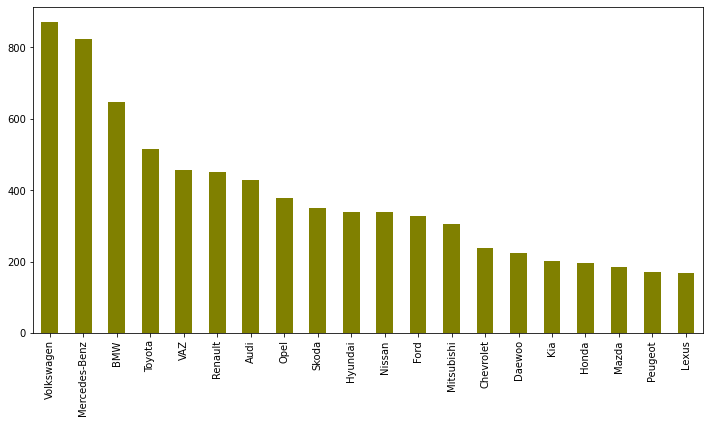

In [44]:
df_cars['car'].value_counts().head(20).plot(kind ='bar', figsize=(12,6),color= 'olive')

<AxesSubplot:>

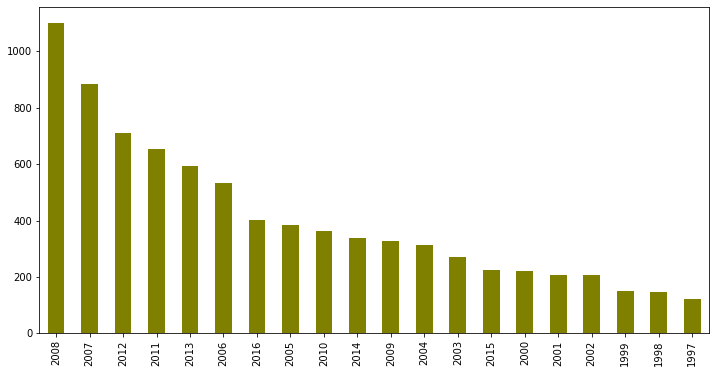

In [45]:
df_cars['year'].value_counts().head(20).plot(kind ='bar', figsize=(12,6),color= 'olive')

In [16]:
print(df_cars['model'].nunique())

863


In [17]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [18]:
df_cars = df_cars[df_cars['drive'].isna() == False]

In [19]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9065 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9065 non-null   object 
 1   price         9065 non-null   float64
 2   body          9065 non-null   object 
 3   mileage       9065 non-null   int64  
 4   engV          9065 non-null   float64
 5   engType       9065 non-null   object 
 6   registration  9065 non-null   object 
 7   year          9065 non-null   int64  
 8   model         9065 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.0+ KB


Petrol    46.286161
Diesel    31.475483
Gas       18.362560
Other      3.875796
Name: engType, dtype: float64

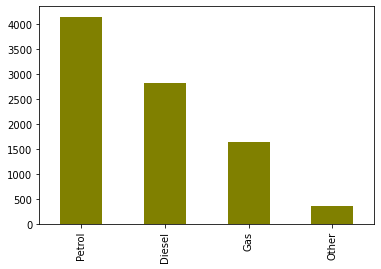

In [53]:
df_cars['engType'].value_counts().plot(kind= 'bar',color='olive')
(df_cars['engType'].value_counts()/len(df_cars)*100)

<AxesSubplot:>

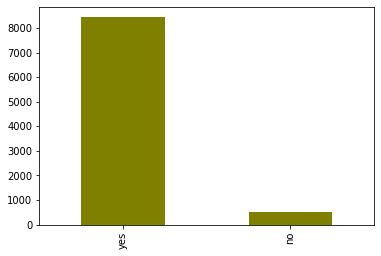

In [49]:
df_cars['registration'].value_counts().plot(kind= 'bar',color='olive')

<AxesSubplot:>

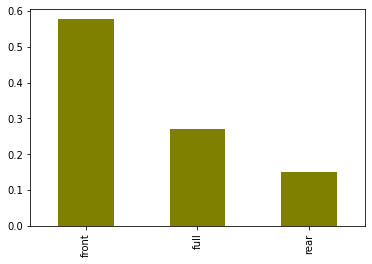

In [68]:
(df_cars['drive'].value_counts()/len(df_cars)).plot(kind= 'bar',color='olive')

In [22]:
df_cars = df_cars[~df_cars.duplicated() == True]

In [23]:
df_cars.shape

(8953, 10)

#### Categorising the mileage for cars in 3 bins

In [24]:
df_cars['mileage-cat'] = np.where(df_cars['mileage']<=333.66,'Low-Mileage',np.where(df_cars['mileage']>=666.33,'High-Mileage','Med-Mileage'))
df_cars['year-slot'] = np.where(df_cars['year']<=2000,'before yr 2000',np.where(df_cars['year']>=2010,'After 2010','Btw 2000 & 2010'))

In [25]:
df_cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,8953.0,15666.138463,23144.655322,259.35,5500.0,9200.0,16600.0,547800.00
mileage,8953.0,144.590193,94.610618,1.00,80.0,130.0,196.0,999.00
engV,8953.0,2.561394,5.350728,0.10,1.6,2.0,2.5,99.99
year,8953.0,2006.555345,6.995090,1953.00,2004.0,2008.0,2012.0,2016.00


<AxesSubplot:xlabel='year', ylabel='price'>

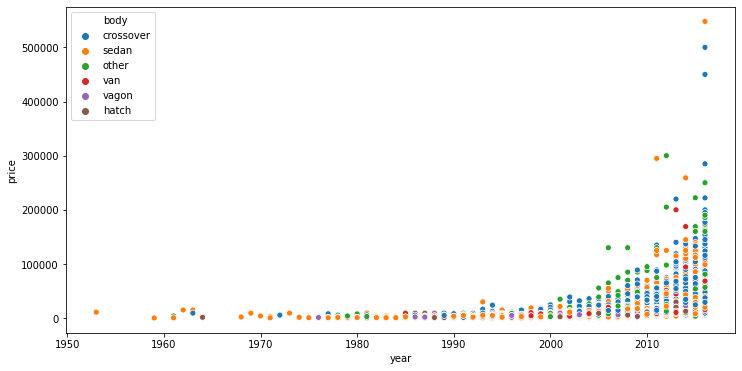

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_cars,x= 'year',y='price',hue = 'body')

<AxesSubplot:xlabel='body'>

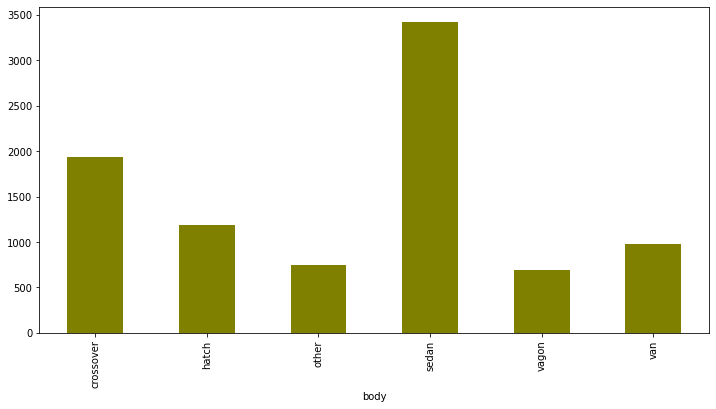

In [69]:
df_cars.groupby(['body'])['mileage'].count().plot(kind='bar',figsize=(12,6),color = 'olive' )

<AxesSubplot:>

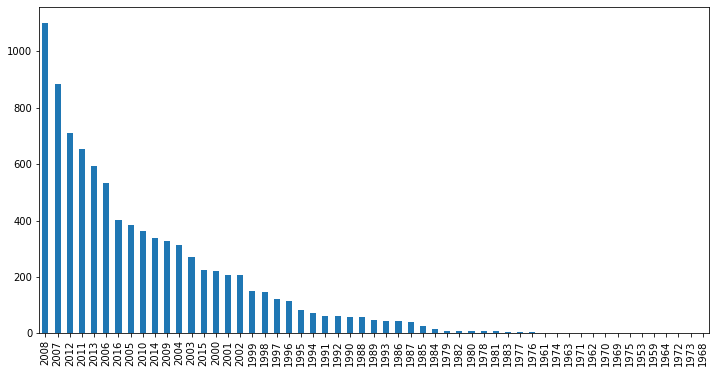

In [29]:
 df_cars['year'].value_counts().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='year', ylabel='price'>

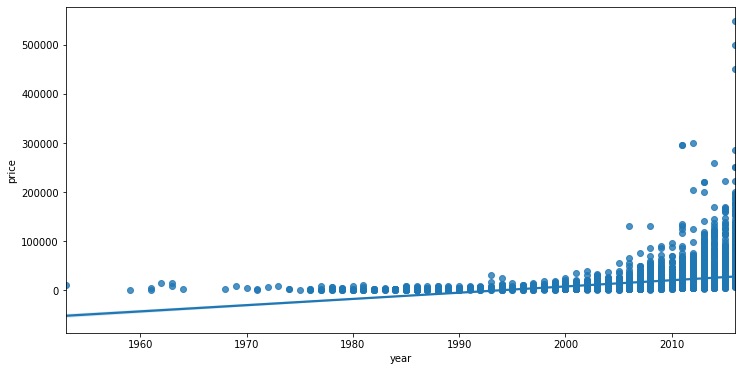

In [30]:
# Engine size as potential predictor variable of price
plt.figure(figsize=(12,6))
sns.regplot(x="year", y="price", data = df_cars)

In [56]:
df_cars.corr()

,price,mileage,engV,year
price,1.000000,-0.254342,0.060403,0.384459
mileage,-0.254342,1.000000,0.043678,-0.457680
engV,0.060403,0.043678,1.000000,-0.036536
year,0.384459,-0.457680,-0.036536,1.000000


<AxesSubplot:xlabel='mileage-cat'>

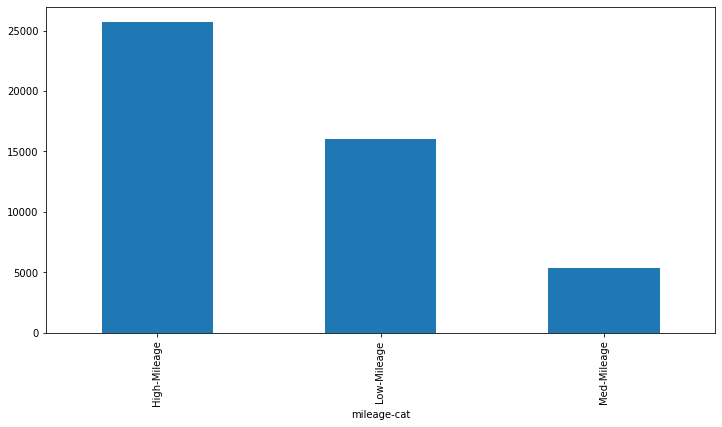

In [31]:
df_cars.groupby(['mileage-cat'])['price'].mean().plot(kind='bar', figsize=(12, 6))

Text(0.5, 1.0, 'Car sales brandwise contribution in %s - Top 10')

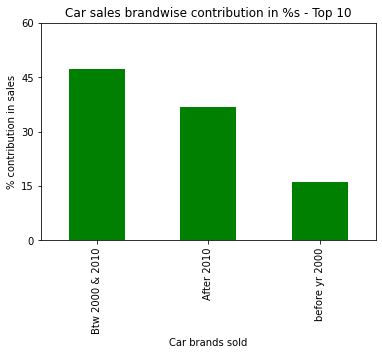

In [32]:
(df_cars['year-slot'].value_counts().head(10)/len(df_cars)*100).plot(kind='bar', fontsize=10, color ='green',yticks= np.arange(0,70,15))
plt.xlabel('Car brands sold')
plt.ylabel('% contribution in sales')
plt.title('Car sales brandwise contribution in %s - Top 10')

Text(0.5, 1.0, 'Average quoted prices in market')

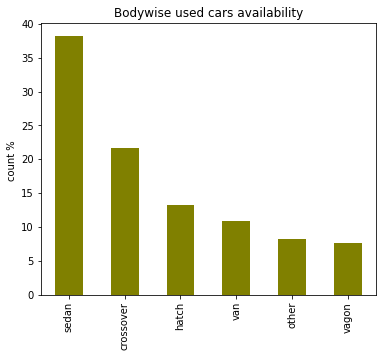

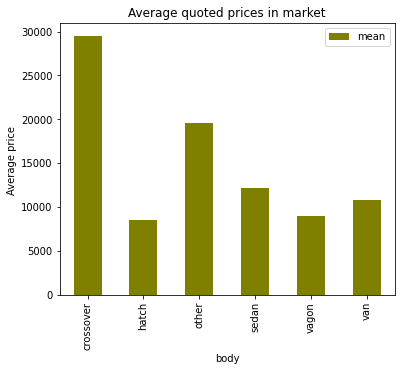

In [65]:
(df_cars['body'].value_counts()/len(df_cars)*100).plot(kind = "bar",color='olive',figsize=(6,5) )
plt.ylabel('count % ')
plt.title('Bodywise used cars availability')

df_cars.groupby('body')['price'].agg(['mean']).plot(kind = "bar",color='olive',figsize=(6,5),subplots = True )
plt.ylabel('Average price ')
plt.title('Average quoted prices in market')

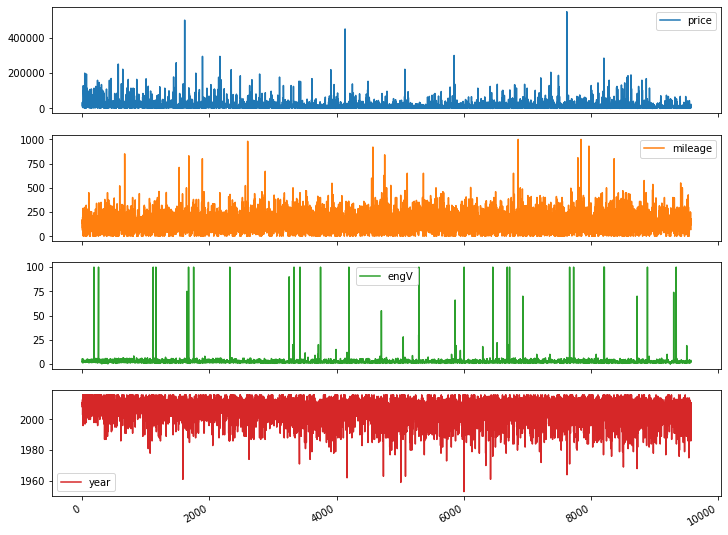

In [34]:
axes = df_cars.plot.line(subplots=True,figsize=(12,10))

<AxesSubplot:ylabel='engType'>

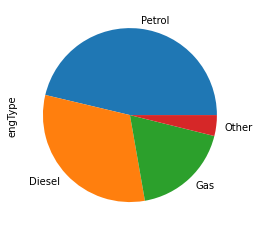

In [35]:
(df_cars['engType'].value_counts()/len(df_cars)*100).plot(kind='pie')

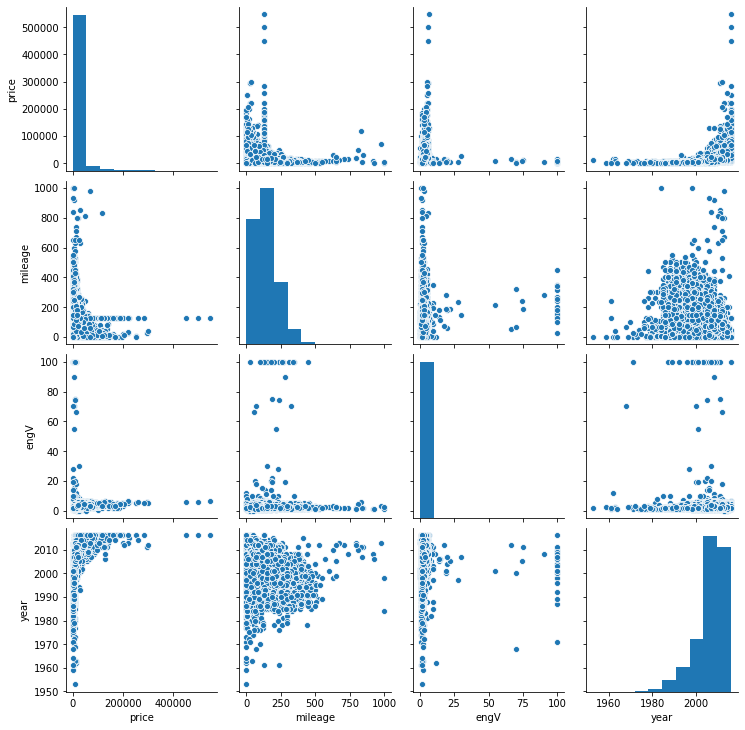

In [36]:
sns.pairplot(df_cars)

<AxesSubplot:xlabel='mileage', ylabel='price'>

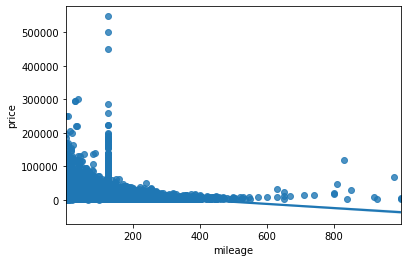

In [37]:
sns.regplot(x='mileage',y='price',data=df_cars)

<AxesSubplot:ylabel='Frequency'>

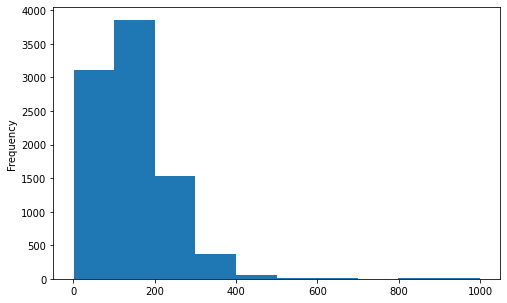

In [38]:
df_cars['mileage'].plot(kind='hist',figsize=(8,5))

<AxesSubplot:xlabel='year', ylabel='price'>

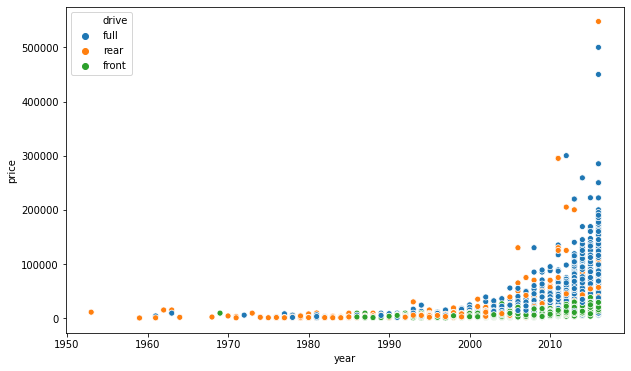

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='price', data = df_cars,hue= 'drive')


<AxesSubplot:xlabel='engType'>

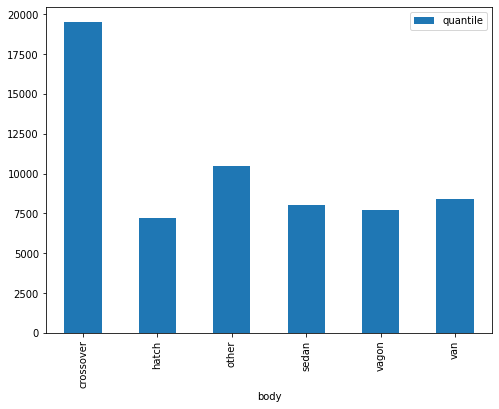

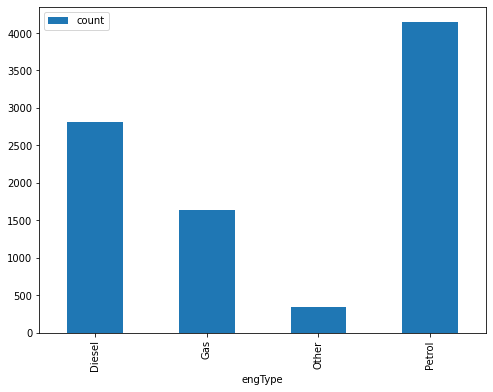

In [40]:
df_cars.groupby(['body'])['price'].agg(['quantile']).plot(kind='bar',figsize=(8,6))
df_cars.groupby(['engType'])['price'].agg(['count']).plot(kind='bar',figsize=(8,6))

# 8.Summarization

---------------------------------------------------------------------------------------------------------------------------

- As per sample data ,prices in the used car market is not only dependent on the features as per correlation matrix and can be safely assumed condition of the car is also one of the factors.

- Sedans are more sought after by buyers in used car segment as per the sample data.

- Prices quoted for the cross-overs is more and sellers would benefit if they increase their sales volume.

- Other fuel types namely EV’s still majorly available in market .
